In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert6/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert6/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert6/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert6/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert6/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert6/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert6/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert6/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert6/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(36, 288, 36, 288, 36, 36)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(324, 324)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

324

In [10]:
df_train

,labels
0,1
1,1
2,4
3,4
4,0
...,...
319,3
320,4
321,1
322,0


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.000009,0.998451,0.000009,0.000476,0.001055,8.557288e-05,0.401711,0.000276,0.593366,0.004562
1,0.996802,0.000029,0.001060,0.002031,0.000078,9.907850e-01,0.000677,0.001431,0.007105,0.000002
2,0.000055,0.984853,0.000052,0.004733,0.010307,1.789112e-04,0.509679,0.000037,0.041105,0.449001
3,0.000135,0.000412,0.027676,0.000372,0.971404,1.368741e-04,0.898490,0.002626,0.048424,0.050323
4,0.000010,0.001329,0.001463,0.000080,0.997118,1.088503e-04,0.129593,0.000006,0.011981,0.858310
5,0.000007,0.005048,0.000959,0.000286,0.993700,3.225204e-06,0.975803,0.000015,0.006814,0.017364
6,0.000009,0.001141,0.001569,0.000072,0.997209,2.792140e-03,0.020383,0.000079,0.000201,0.976545
7,0.000016,0.995965,0.000019,0.001374,0.002626,2.202720e-05,0.960345,0.000035,0.012108,0.027490
8,0.001041,0.000968,0.000325,0.997347,0.000318,1.054758e-04,0.011310,0.000009,0.988528,0.000048
9,0.001056,0.000757,0.000480,0.997428,0.000279,6.601603e-03,0.347719,0.000860,0.587741,0.057078


In [13]:
len(x_test),len(x_train)

(36, 324)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.000014,0.996867,0.000015,0.000948,0.002155,0.000006,0.993642,0.000016,0.005222,0.001114
1,0.000021,0.994115,0.000027,0.001585,0.004252,0.000407,0.508948,0.002905,0.487433,0.000307
2,0.000005,0.002383,0.000890,0.000189,0.996533,0.000258,0.038134,0.000007,0.003343,0.958257
3,0.000006,0.002244,0.000991,0.000149,0.996611,0.000393,0.108225,0.000089,0.003021,0.888271
4,0.997547,0.000038,0.000761,0.001559,0.000094,0.997733,0.000285,0.000982,0.000992,0.000007
...,...,...,...,...,...,...,...,...,...,...
319,0.000370,0.001043,0.000404,0.997944,0.000239,0.000007,0.014171,0.000043,0.984805,0.000974
320,0.000010,0.000530,0.002851,0.000055,0.996554,0.000222,0.030764,0.000004,0.001396,0.967615
321,0.000005,0.998833,0.000006,0.000302,0.000854,0.004232,0.799041,0.000788,0.112938,0.083000
322,0.996556,0.000024,0.001361,0.002001,0.000058,0.882208,0.000084,0.117683,0.000022,0.000003


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

324

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [18]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(324,)
y_train, y_train.shape

(array([1, 1, 4, 4, 0, 0, 4, 2, 4, 3, 1, 0, 0, 2, 4, 4, 3, 3, 2, 4, 4, 0,
        4, 1, 0, 1, 0, 1, 3, 2, 3, 0, 0, 0, 4, 0, 1, 4, 1, 3, 0, 2, 4, 1,
        1, 1, 0, 4, 0, 4, 2, 2, 3, 3, 2, 0, 2, 4, 0, 0, 3, 4, 0, 2, 1, 0,
        1, 0, 1, 0, 2, 0, 0, 4, 2, 3, 0, 0, 0, 0, 0, 3, 3, 0, 2, 2, 3, 1,
        4, 0, 0, 0, 2, 2, 3, 1, 0, 2, 3, 0, 3, 3, 0, 2, 3, 0, 0, 0, 3, 4,
        4, 3, 0, 0, 0, 0, 1, 3, 0, 2, 0, 3, 3, 0, 0, 4, 0, 0, 3, 0, 3, 0,
        0, 1, 3, 3, 0, 2, 3, 0, 2, 0, 0, 4, 1, 3, 4, 0, 0, 1, 1, 3, 1, 0,
        1, 4, 1, 0, 1, 4, 4, 1, 2, 2, 3, 0, 4, 0, 3, 0, 1, 1, 2, 2, 2, 0,
        0, 0, 3, 0, 0, 4, 2, 2, 0, 3, 0, 2, 4, 0, 2, 0, 4, 2, 3, 4, 2, 4,
        0, 2, 0, 3, 3, 0, 4, 3, 0, 1, 0, 1, 2, 0, 3, 1, 4, 2, 1, 2, 2, 4,
        0, 3, 2, 0, 2, 0, 1, 4, 1, 0, 3, 0, 1, 4, 2, 2, 0, 1, 3, 4, 3, 1,
        0, 1, 0, 1, 0, 2, 0, 4, 4, 2, 1, 0, 4, 2, 2, 0, 4, 4, 2, 2, 3, 3,
        1, 4, 4, 4, 4, 2, 0, 1, 3, 2, 0, 2, 0, 1, 3, 4, 0, 0, 0, 2, 4, 1,
        0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 

# training machine learning

In [19]:

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

clf = MLPClassifier(hidden_layer_sizes=(40,),random_state=42, max_iter=500).fit(new_x_train, new_y_train)
predictions = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [20]:
predictions

array([1, 0, 1, 4, 4, 4, 4, 1, 3, 3, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 3,
       4, 0, 2, 1, 1, 1, 4, 3, 2, 4, 4, 1, 3, 2])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         6
           4       0.88      1.00      0.93         7

    accuracy                           0.97        36
   macro avg       0.97      0.95      0.96        36
weighted avg       0.98      0.97      0.97        36

----accuracy score 97.22222222222221 ----


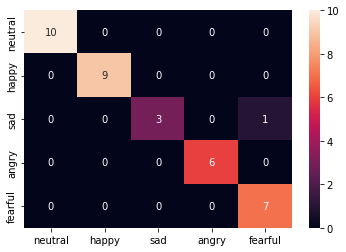

In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [22]:
path='/content/drive/My Drive/fusion/savee_fusion_model/MLP/expert6'
savedvX = joblib.dump(clf, path)

print("MODEL SAVED")

MODEL SAVED
